### Факторный анализ

__Факторный анализ__ — это способ приведения множества непосредственно наблюдаемых факторов $x_j$, $j = 1, \dots, m$, к меньшему числу новых линейно независимых факторов $y_j$, $j = 1, \dots, q$, $q < m$.

Рассмотрим __метод главных компонент__. Этот метод заключается в вычислении собственных значений и собственных векторов для ковариационной матрицы:
$$\operatorname{cov} = \left(
\begin{array}{cccc}
\sigma_1^2 & \sigma_{12} & \dots & \sigma_{1m} \\
\sigma_{12} & \sigma_2^2 & \dots & \sigma_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{1m} & \sigma_{2m} & \dots & \sigma_m^2
\end{array}
\right)
$$

__Краткий экскурс в линейную алгебру__

Давайте разберёмся, что такое собственные векторы и собственные значения матрицы. Рассмотрим матрицу $X$:

In [1]:
import numpy as np

In [2]:
X = np.array([[1,    1.5],
              [1.5, -0.5]])

print(X)

[[ 1.   1.5]
 [ 1.5 -0.5]]


Любая квадратная матрица _действует_ на соответствующих векторах, переставляя их в пространстве. Например, возьмём произвольный вектор:

In [3]:
v = np.array([1.1, -0.9])

Действие матрицы $X$ на этом векторе происходит с помощью операции _умножения матриц_. Подробнее про умножение матриц: 

Например, умножим матрицу $X$ на выбранный вектор $v$. В результате, получим какой-то новый вектор:

In [4]:
X.dot(v)

array([-0.25,  2.1 ])

Визуализируем этот процесс на картинке. Здесь синим обозначен вектор $v$, а оранжевым — его образ $X \cdot v$.

In [5]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

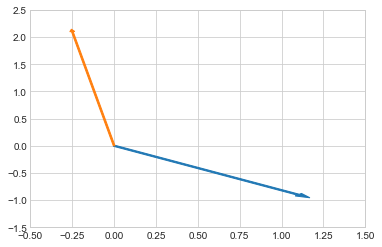

In [7]:
plt.arrow(0, 0, v[0], v[1], color='C0', width=0.02)
plt.arrow(0, 0, X.dot(v)[0], X.dot(v)[1], color='C1', width=0.01)

plt.xlim(-0.5, 1.5)
plt.ylim(-1.5, 2.5);

Вектор $v$ и его _образ_ под действием $X$ не имеют между собой ничего особенно общего. 

Оказывается, для любой матрицы существуют особые векторы, которые под действием этой матрицы либо растягиваются, либо сжимаются. Такие векторы называются __собственными__. Вычислим собственные векторы и собственные значения (о них чуть позже) для матрицы $X$:

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(X)

print(f'собственные значения:\n{eigenvalues}\n')
print(f'собственные векторы:\n{eigenvectors}')

собственные значения:
[ 1.92705098 -1.42705098]

собственные векторы:
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


_Замечание_. Векторы тут записаны именно _в столбцах_.

Итак, возьмём, например, первый из этих векторов и попробуем подействовать матрицей на него.

In [9]:
v = eigenvectors[:, 0]
v

array([0.85065081, 0.52573111])

In [10]:
X.dot(v)

array([1.63924748, 1.01311066])

(0.0, 1.5)

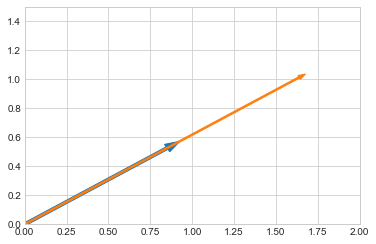

In [11]:
plt.arrow(0, 0, v[0], v[1], color='C0', width=0.02)
plt.arrow(0, 0, X.dot(v)[0], X.dot(v)[1], color='C1', width=0.01)

plt.xlim(0, 2)
plt.ylim(0, 1.5)

Как мы видим, вектор $v$ (синий) под действием матрицы $X$ растянулся (оранжевый). Давайте проверим, во сколько раз он растянулся.

In [12]:
X.dot(v) / v

array([1.92705098, 1.92705098])

Если покомпонентно разделить образ $X \cdot v$ на оригинальный вектор $v$, мы увидим, что значения получились одинаковыми. Это согласуется с тем, что векторы $X \cdot v$ и $v$ параллельны друг другу.

In [13]:
v * 1.92705098

array([1.63924747, 1.01311065])

In [14]:
X.dot(v)

array([1.63924748, 1.01311066])

Отметим, что этот множитель мы уже где-то видели. Он является собственным значением, соответствующим этому вектору:

In [15]:
eigenvalues

array([ 1.92705098, -1.42705098])

Итак, для матрицы $X$ __собственный вектор__ — это такой вектор, который под действием $X$ не меняет направление, а лишь растягивается или сжимается. __Собственное значение__, соответствующее этому собственному вектору — это тот коэффициент, на который он растягивается/сжимается.

__Назад к методу главных компонент__

Допустим, имеется матрица объект-признак: $X = \left( x_{ij} \right)_{n \times m}$ (т.е. $n$ объектов, $m$ признаков).

__Метод главных компонент__:

1. _Центрировать_ матрицу $X$, т.е. вычесть из каждого столбца среднее по этому столбцу. В результате получится матрица $X^\ast = \left( x_{ij}^\ast \right)_{n \times m}$, в которой средние по столбцам равны $0$.
2. Вычислить матрицу несмещённых оценок ковариаций $\operatorname{cov} = \left( \sigma_{ij} \right)_{m \times m}$.
3. Вычислить собственные векторы и собственные значения матрицы $\operatorname{cov}$.
4. Пусть $T$ — матрица, составленная из $q$ собственных векторов (столбцов), соответствующих $q$ наибольшим собственным значениям. Новая матрица объект-признак: $Y = X^\ast \cdot T$.

__Пример 4__

Рассмотрим матрицу объект признак:

In [16]:
samples = np.array([[ 2.36499331, -0.57978654],
                    [ 5.70144948,  3.54257542],
                    [ 5.27028536,  2.1560189 ],
                    [ 4.14275078,  0.39188923],
                    [ 3.93109011,  0.87195848],
                    [ 4.59408573,  2.17496773],
                    [ 3.53666882,  0.84484304],
                    [ 5.13601245,  2.74557671],
                    [ 4.40989037,  1.7030094 ],
                    [ 5.05796456,  1.86949263]])

Поскольку признаков всего $2$, соответствующие объекты можно расположить на плоскости:

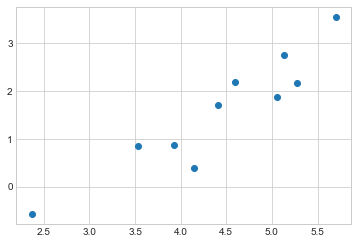

In [17]:
plt.scatter(samples[:, 0], samples[:, 1])

Как мы видим, объекты более-менее лежат на одной прямой. Это означает, что мы можем попытаться заменить два признака на один, при этом не потеряв слишком много информации. Для этого воспользуемся методом главных компонент. Сначала центрируем наши данные:

In [20]:
samples.mean(axis=0, keepdims=True)

array([[4.4145191, 1.5720545]])

In [21]:
samples_centered = samples - samples.mean(axis=0, keepdims=True)

print(samples_centered)

[[-2.04952579 -2.15184104]
 [ 1.28693038  1.97052092]
 [ 0.85576626  0.5839644 ]
 [-0.27176832 -1.18016527]
 [-0.48342899 -0.70009602]
 [ 0.17956663  0.60291323]
 [-0.87785028 -0.72721146]
 [ 0.72149335  1.17352221]
 [-0.00462873  0.1309549 ]
 [ 0.64344546  0.29743813]]


In [22]:
samples_centered.mean(axis=0)

array([-3.10862447e-16, -1.33226763e-16])

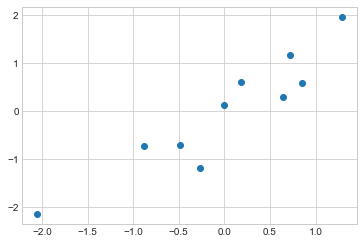

In [23]:
plt.scatter(samples_centered[:, 0], samples_centered[:, 1])

Теперь посчитаем матрицу ковариаций. Отметим, что если функция `numpy.cov` получает на вход двумерный массив, а не несколько одномерных массивов, то ожидается, что значения каждого признака будут расположены в строках (а не в столбцах, как у нас). Поэтому в эту функцию мы подаём транспонированную матрицу `samples_centered.T`.

In [26]:
cov = np.cov(samples_centered.T, ddof=1)

print(cov)

[[0.95934497 1.09880063]
 [1.09880063 1.45693615]]


In [27]:
np.var(samples_centered, axis=0, ddof=1)

array([0.95934497, 1.45693615])

Собственные значения и собственные векторы можно теперь получить с помощью функции `numpy.linalg.eig`.

In [28]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

print(f'eigenvalues:\n{eigenvalues}\n')
print(f'eivenvectors:\n{eigenvectors}')

eigenvalues:
[0.08152525 2.33475587]

eivenvectors:
[[-0.78129206 -0.62416562]
 [ 0.62416562 -0.78129206]]


Ещё раз напомним, что в массиве `eigenvectors` векторы записаны именно в столбцах.

Итак, мы хотим получить один признак, поэтому возьмём второй вектор (он соответствует второму собственному значению, которое сильно больше первого). Домножим матрицу `samples_centered` на этот вектор, чтобы получить новую матрицу объект-признак.

In [29]:
samples_centered

array([[-2.04952579, -2.15184104],
       [ 1.28693038,  1.97052092],
       [ 0.85576626,  0.5839644 ],
       [-0.27176832, -1.18016527],
       [-0.48342899, -0.70009602],
       [ 0.17956663,  0.60291323],
       [-0.87785028, -0.72721146],
       [ 0.72149335,  1.17352221],
       [-0.00462873,  0.1309549 ],
       [ 0.64344546,  0.29743813]])

In [30]:
eigenvectors[:, [1]]

array([[-0.62416562],
       [-0.78129206]])

In [31]:
new_samples = samples_centered.dot(eigenvectors[:, [1]])

print(new_samples)

[[ 2.96045985]
 [-2.34281004]
 [-0.99038663]
 [ 1.09168219]
 [ 0.84871921]
 [-0.58313064]
 [ 1.1160885 ]
 [-1.36719493]
 [-0.09942493]
 [-0.63400259]]


Качество метода главных компонент можно оценить, сравнивая дисперсии признаков до и после применения метода. 
    
Пусть $\sigma_X^2$ — сумма дисперсий признаков до применения метода, а $\sigma_Y^2$ — сумма дисперсий после применения метода. Тогда __доля объяснённой дисперсии__ равна отношению 
$$\dfrac{\sigma_Y^2}{\sigma_X^2}$$

_Замечание_. Поскольку мы в некотором смысле «отсеиваем» признаки, сумма дисперсий после применения метода не может быть больше, чем до.

Долю объяснённой дисперсии можно интерпретировать как процент сохранённой информации.

Посчитаем долю объяснённой дисперсии этого нового признака. Общая дисперсия до применения метода:

In [32]:
variance_before = np.var(samples, axis=0, ddof=1).sum()
variance_before

2.416281116587471

Посчитаем несмещённую оценку дисперсии нового признака и найдём его долю от общей дисперсии:

In [34]:
variance_after = np.var(new_samples, axis=0, ddof=1).sum()

variance_after

2.3347558703559046

In [35]:
variance_after / variance_before

0.966260032546749

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
print(pca.fit_transform(samples))
print(pca.explained_variance_ratio_)

[[ 2.96045985]
 [-2.34281004]
 [-0.99038663]
 [ 1.09168219]
 [ 0.84871921]
 [-0.58313064]
 [ 1.1160885 ]
 [-1.36719493]
 [-0.09942493]
 [-0.63400259]]
[0.96626003]


Такое значение доли объяснённой дисперсии можно интерпретировать так: используя новые данные вместо старых, мы сохраним около $96.6\%$ информации, т.е. потеряем лишь $3.4 \%$, что довольно неплохо.